In [171]:
# Use HMMLearn to experiment with the data
# Matrix Pi, A, and B
 

import numpy as np
import matplotlib.pyplot as plt
from hmmlearn import hmm 
from hmmlearn.hmm import MultinomialHMM 
from hmmlearn.hmm import GaussianHMM 
import warnings
import random
import seaborn as sb

warnings.filterwarnings('ignore')

In [172]:
# inputfile = '../../Data/Columnar Transposition Cipher/text_length_100.txt'

In [183]:
# vigenere cipher: row: key, col plaintext
#
count = 0
cipherText = [] # [12,3,21,23,5....]

# sample.txt: 
# shift cipher
# fdpwpddqzclyjestyrmfeclntyrnlcdtxcfoojwlkjlyotxrpeetyrzytyjplcdterpeddz
# qcfdecletyrmfeespylrltytozyevyzhhsletnzfwooztqtrlgpfaclntyrsldxzddyzdet
# cwtyrgtcefpdtlaacpntlepmplfejzypzqytvtelvscfdsnspgdxzdepye 
# key: 11, reading from line 8977
with open('sample.txt', "r") as txt: 
    for line in txt:
        for e in line:
            cipherText.append(ord(e) - 97)
    
print(cipherText)

[5, 3, 15, 22, 15, 3, 3, 16, 25, 2, 11, 24, 9, 4, 18, 19, 24, 17, 12, 5, 4, 2, 11, 13, 19, 24, 17, 13, 11, 2, 3, 19, 23, 2, 5, 14, 14, 9, 22, 11, 10, 9, 11, 24, 14, 19, 23, 17, 15, 4, 4, 19, 24, 17, 25, 24, 19, 24, 9, 15, 11, 2, 3, 19, 4, 17, 15, 4, 3, 3, 25, 16, 2, 5, 3, 4, 2, 11, 4, 19, 24, 17, 12, 5, 4, 4, 18, 15, 24, 11, 17, 11, 19, 24, 19, 14, 25, 24, 4, 21, 24, 25, 7, 7, 18, 11, 4, 19, 13, 25, 5, 22, 14, 14, 25, 19, 16, 19, 17, 11, 6, 15, 5, 0, 2, 11, 13, 19, 24, 17, 18, 11, 3, 23, 25, 3, 3, 24, 25, 3, 4, 19, 2, 22, 19, 24, 17, 6, 19, 2, 4, 5, 15, 3, 19, 11, 0, 0, 2, 15, 13, 19, 11, 4, 15, 12, 15, 11, 5, 4, 9, 25, 24, 15, 25, 16, 24, 19, 21, 19, 4, 11, 21, 18, 2, 5, 3, 18, 13, 18, 15, 6, 3, 23, 25, 3, 4, 15, 24, 4]


In [215]:
# normalize matrix
N = 26
M = 26

pi = []
total = 0
# initialize pi
for i in range(N):
    pi.append(random.uniform(0.035, 0.038)) # double between 0 and 1
    total += pi[i]

#stochastic = 0
for i in range(N):
    pi[i] = pi[i] / total
    #stochastic += pi[i]
print(pi)

[0.038572079786303996, 0.04017581445108857, 0.04016756117770664, 0.03975443016226577, 0.039575524542534005, 0.03745627633627971, 0.03997691248519665, 0.037254357175842516, 0.03904632061535198, 0.03829511673739546, 0.040256347877470434, 0.040142852994930985, 0.03751140995391627, 0.037120683156106886, 0.03729226110602096, 0.03746156122552844, 0.03715771747545765, 0.03721873116182483, 0.039064206950152496, 0.038206960927092574, 0.03776278298176029, 0.037461802999002355, 0.03833582714213558, 0.037515286668675485, 0.03797494658858605, 0.039242227321373446]


In [216]:
total_A = 0
total_B = 0
initial_A = [[0] * M for i in range(N)] # throw 0 into the array first
initial_B = [[0] * M for i in range(N)] # throw 0 into the array first
# initialize B and normalize
for i in range(N):
    for j in range(N):
        initial_A[i][j] = random.uniform(0.035, 0.038)
        total_A += initial_A[i][j]
        initial_B[i][j] = random.uniform(0.035, 0.038)
        total_B += initial_B[i][j]
    for e in range(N):
        initial_A[i][e] =  initial_A[i][e] / total_A
        initial_B[i][e] =  initial_B[i][e] / total_B
    total_A = 0
    total_B = 0

In [217]:
print(initial_A)

[[0.03932046770091905, 0.03750369766383597, 0.04008995722944094, 0.03802003846398166, 0.037561901233634544, 0.039211387751357615, 0.038519377458466134, 0.03825832812047351, 0.03992284872209878, 0.037435285441468985, 0.03886785376483814, 0.03875756811302804, 0.03913097820644874, 0.038116433108439554, 0.03777528941128251, 0.038514845724744895, 0.03756189977288765, 0.038107144551370306, 0.0377849100047675, 0.038311492834999405, 0.03719063004481809, 0.03873790748717145, 0.039919193374255764, 0.03887480643147259, 0.03813132533329561, 0.038374432050502755], [0.04033022953529407, 0.03743061614719621, 0.0379938655181968, 0.0395618320347922, 0.03766733872310263, 0.03982827387313055, 0.040215313329171345, 0.039721662542210705, 0.037612269750508846, 0.037471423018990965, 0.03791618260432319, 0.03959079320932786, 0.03931559542713966, 0.03759236611120071, 0.03735687869280524, 0.0390523218628571, 0.03781668445868924, 0.03718681065882433, 0.03722698803673144, 0.03857113915493909, 0.038478681594450344

In [218]:
print(initial_B)

[[0.03709246044695952, 0.038358437190932355, 0.03973054775806588, 0.03850381748620127, 0.03917312202404863, 0.037152212158027026, 0.03725762506539886, 0.037121573905031256, 0.03902285935169323, 0.0379341289048273, 0.037153045219236965, 0.03937092832364711, 0.03843134973051943, 0.0383002200942095, 0.038072894298944455, 0.039591941038976376, 0.03840479943407228, 0.03779292006416924, 0.03865066002627651, 0.039282077290746745, 0.03922190757030618, 0.03903487014691065, 0.039841447922876916, 0.038271488169879506, 0.03857673832385152, 0.038655928054191345], [0.03838882479294306, 0.03867989351712893, 0.03885599232826663, 0.03696714308213037, 0.03969040093975263, 0.03726847105343045, 0.03979983512058823, 0.03716201668069148, 0.037300664703978095, 0.0389997291928434, 0.03817911272759891, 0.03867387841275707, 0.03893439286465805, 0.038365194870888415, 0.03707198545251747, 0.03991736945323527, 0.03789957534347314, 0.03924948217101277, 0.03951240973695539, 0.03858240121414075, 0.03773115897398108, 

In [219]:
# verify if row stochastic
for i in range(N):
    for j in range(N):
        total += initial_A[i][j]
    print(total)
    total = 0

1.9432010151737225
0.9999999999999999
0.9999999999999999
0.9999999999999999
0.9999999999999997
0.9999999999999996
0.9999999999999998
0.9999999999999999
1.0000000000000002
1.0
1.0
1.0000000000000002
1.0
0.9999999999999999
1.0
1.0
1.0000000000000002
0.9999999999999999
0.9999999999999999
1.0
1.0000000000000002
1.0
1.0
1.0000000000000002
1.0000000000000002
1.0000000000000002


In [220]:
for i in range(N):
    for j in range(N):
        total += initial_B[i][j]
    print(total)
    total = 0

1.0
0.9999999999999999
1.0
1.0
1.0
0.9999999999999999
0.9999999999999999
0.9999999999999999
1.0000000000000002
1.0000000000000002
1.0
1.0
1.0000000000000002
0.9999999999999999
1.0
0.9999999999999998
1.0000000000000002
0.9999999999999996
1.0
1.0
0.9999999999999998
0.9999999999999999
0.9999999999999999
1.0
0.9999999999999999
1.0


In [221]:
startprob = np.array(pi)
transmat = np.array(initial_A)
emissionprob = np.array(initial_B)

# The requirement follows from the definition of the 
# Multinomial distribution (see https://en.wikipedia.org/wiki/Multinomial_distribution ). 
# If the sample does not conform to it, need to use 
# LabelEncoder from scikit-learn to manually project it 
# to the required range
from sklearn.preprocessing import LabelEncoder
cipherText = LabelEncoder().fit_transform(cipherText)

# print(cipherText)

h = MultinomialHMM(n_components=N,startprob=startprob,transmat=transmat, n_iter=100)

X = np.array(cipherText) # cipherText is the observation 
X = X.reshape(200,1).T
h.fit(X) # train on the obersvation

MultinomialHMM(algorithm='viterbi',
        init_params='abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ',
        n_components=26, n_iter=100,
        params='abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ',
        random_state=<mtrand.RandomState object at 0x10834aa68>,
        startprob=None, startprob_prior=1.0, thresh=0.01, transmat=None,
        transmat_prior=1.0)

In [222]:
print(h.emissionprob_)

[[  8.54017711e-18   8.54017711e-18   6.58136838e-07   8.54017711e-18
    8.54017711e-18   8.54017711e-18   6.31671219e-03   8.54017711e-18
    8.54017711e-18   7.55643987e-05   8.54017711e-18   8.54017711e-18
    8.54017711e-18   6.01173994e-08   8.54017711e-18   8.54017711e-18
    8.54017711e-18   8.54017711e-18   8.54017711e-18   8.54017711e-18
    8.54017711e-18   8.54017711e-18   3.20685436e-02]
 [  8.54017711e-18   8.54017711e-18   8.54017711e-18   8.54017711e-18
    3.84615304e-02   8.54017711e-18   8.54017711e-18   8.54017711e-18
    8.54017711e-18   8.54017711e-18   8.54017711e-18   8.54017711e-18
    8.54017711e-18   8.54017711e-18   8.54017711e-18   8.54017711e-18
    8.54017711e-18   8.54017711e-18   8.54017711e-18   8.54017711e-18
    8.54017711e-18   8.09042515e-09   8.54017711e-18]
 [  8.54017711e-18   8.54017711e-18   8.54017711e-18   8.54030319e-18
    8.54017711e-18   8.54017711e-18   1.65218510e-17   8.54017711e-18
    8.54017711e-18   1.53170644e-02   2.31444740e-02

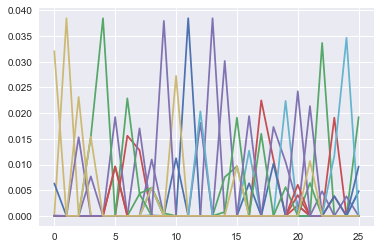

In [223]:
plt.plot(h.emissionprob_)
plt.show()

In [224]:
# shift cipher
# fdpwpddqzclyjestyrmfeclntyrnlcdtxcfoojwlkjlyotxrpeetyrzytyjplcdterpeddz
# qcfdecletyrmfeespylrltytozyevyzhhsletnzfwooztqtrlgpfaclntyrsldxzddyzdet
# cwtyrgtcefpdtlaacpntlepmplfejzypzqytvtelvscfdsnspgdxzdepye 
# key: 11, reading from line 8977

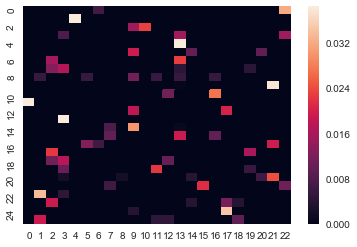

In [225]:
heat_map = sb.heatmap(h.emissionprob_)
plt.show()

In [226]:
print(h.predict(X))

ValueError: too many values to unpack (expected 2)